In [2]:
import pandas as pd 
import numpy as np
import warnings


In [3]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [4]:
#This code disables warnings in python
warnings.filterwarnings('ignore')

In [59]:
df= pd.read_csv('HR_Dataset.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [60]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [61]:
df.rename(columns={'Departments ':'departments'}, inplace=True)

In [62]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [63]:
#Finding rows and columns of our dataset
df.shape

(14999, 10)

In [65]:
#Getting information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [66]:
#Getting statistics of our dataset
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [67]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
departments              0
salary                   0
dtype: int64

In [69]:
df.duplicated().any()

np.True_

In [70]:
df=df.drop_duplicates()

In [71]:
df.shape

(11991, 10)

<Axes: xlabel='left'>

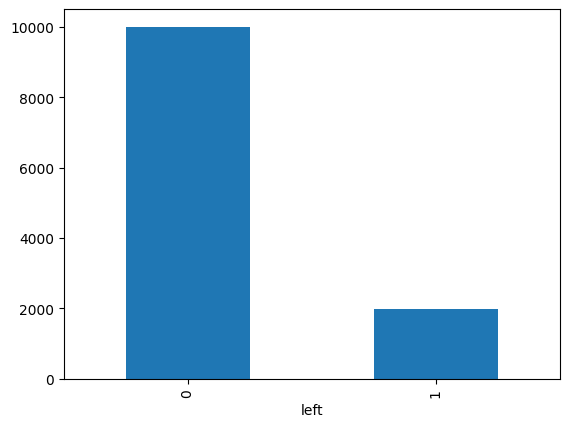

In [72]:
#Checking our target variable left
df['left'].value_counts().plot(kind='bar')

In [73]:
#Here we are going to store our independent variable in "x" and dependent variable in vector "y"
x=df.drop(columns=['left'])


In [74]:
y=df['left']

In [75]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

In [115]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


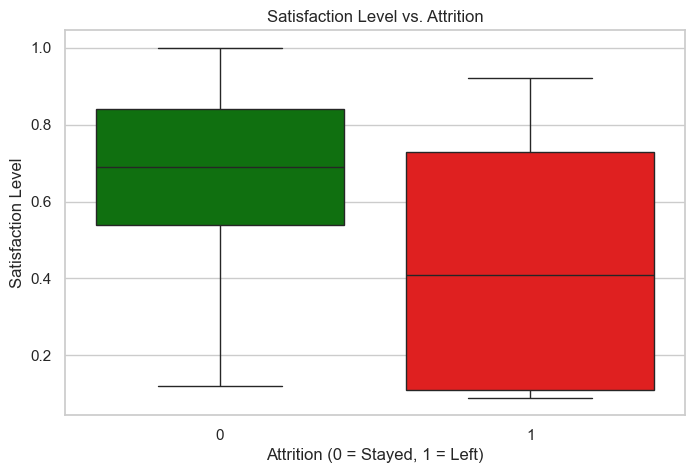

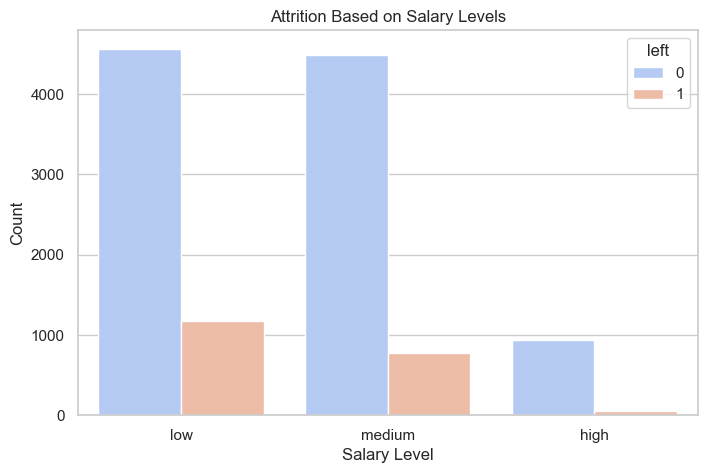

KeyError: 'Departments'

<Figure size 1200x500 with 0 Axes>

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for visuals
sns.set(style="whitegrid")

# Boxplot for Satisfaction Level by Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["left"], y=df["satisfaction_level"], palette=["green", "red"])
plt.title("Satisfaction Level vs. Attrition")
plt.xlabel("Attrition (0 = Stayed, 1 = Left)")
plt.ylabel("Satisfaction Level")
plt.show()

# Barplot for Salary Distribution by Attrition
plt.figure(figsize=(8, 5))
sns.countplot(x="salary", hue="left", data=df, palette="coolwarm")
plt.title("Attrition Based on Salary Levels")
plt.xlabel("Salary Level")
plt.ylabel("Count")
plt.show()

# Department-Wise Attrition Rates
plt.figure(figsize=(12, 5))
sns.countplot(y="Departments", hue="left", data=df, palette="coolwarm", order=df["Departments"].value_counts().index)
plt.title("Attrition Rate by Department")
plt.xlabel("Count")
plt.ylabel("Department")
plt.show()


In [133]:
# Check column names to identify any discrepancies
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [87]:
#Creating column transformer
preprocessor = ColumnTransformer(transformers=[('num',StandardScaler(),['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company',
                                                         'Work_accident','promotion_last_5years']),
                                ('nominal',OneHotEncoder(),['departments']),
                               ('ordinal', OrdinalEncoder(), ['salary'])


                               ],remainder='passthrough')    
                                                         


In [88]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['satisfaction_level', 'last_evaluation',
                                  'number_project', 'average_montly_hours',
                                  'time_spend_company', 'Work_accident',
                                  'promotion_last_5years']),
                                ('nominal', OneHotEncoder(), ['departments']),
                                ('ordinal', OrdinalEncoder(), ['salary'])])

In [90]:
#Building a machine learning pipeline
pipeline=Pipeline([('preprocessor',preprocessor),
                  ('model',LogisticRegression()) ])

In [92]:
#Visualizing our pipeline
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

In [93]:
#Splitting our dataset into training and testing set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)


In [94]:
#Training our creating pipeline in our training set
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

In [95]:
#Performing prediction using our created pipeline
y_pred=pipeline.predict(x_test)

In [96]:
accuracy_score(y_test,y_pred)

0.8370154230929554

From the above observation we know that logistic regression is almost 83% accurate for this dataset

In [97]:
precision_score(y_test,y_pred)

0.5209580838323353

In [98]:
recall_score(y_test,y_pred)

0.2185929648241206

From the above data we come to know that our precision and recall score is very less as compared to accuray score because our 
data is highly imbalance.So, we have to use other machine learning models as well.

In [107]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

def model_scorer(model_name, model, preprocessor, x, y):
    output = []
    output.append(model_name)

    # Create the pipeline with the given model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)  # Use the passed model instead of LogisticRegression()
    ])

    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.20, random_state=42, stratify=y
    )

    # Train the model
    pipeline.fit(x_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(x_test)

    # Append evaluation metrics
    output.append(accuracy_score(y_test, y_pred))
    output.append(precision_score(y_test, y_pred))
    output.append(recall_score(y_test, y_pred))

    return output  


In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Dictionary of models
models_dict = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC()
}

print(models_dict)


{'Logistic Regression': LogisticRegression(), 'Random Forest': RandomForestClassifier(), 'Gradient Boosting': GradientBoostingClassifier(), 'Support Vector Machine': SVC()}


In [110]:
results = []

for model_name, model in models_dict.items():
    result = model_scorer(model_name, model, preprocessor, x, y)
    results.append(result)

# Display results
for res in results:
    print(res)


['Logistic Regression', 0.8370154230929554, 0.5209580838323353, 0.2185929648241206]
['Random Forest', 0.9854105877448937, 0.9892183288409704, 0.9221105527638191]
['Gradient Boosting', 0.9795748228428511, 0.9462915601023018, 0.9296482412060302]
['Support Vector Machine', 0.9708211754897874, 0.91, 0.914572864321608]


From the above observation we know that Random Forest is the best model for our data so we will frame random forest with our pipeline for our entire dataset.

In [122]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define categorical columns
categorical_cols = ['departments']  # Replace with actual categorical column names

# Create preprocessor
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')  # Keep numerical columns as they are


In [123]:
from sklearn.preprocessing import OrdinalEncoder

# Define ordinal columns
ordinal_cols = ['job_level']  # Example column with ordered categories

preprocessor = ColumnTransformer([
    ('ordinal', OrdinalEncoder(), ordinal_cols)
], remainder='passthrough')


In [114]:
print(x.dtypes)
print(x.head())


satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
departments               object
salary                    object
dtype: object
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years departments  \
0                   3              0                      0       sales   
1                   6              0                      

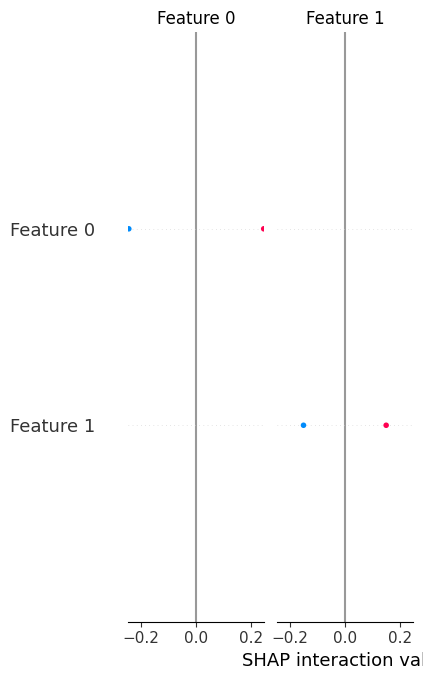

IndexError: list index out of range

In [130]:
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Example dataset (replace with actual data)
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8],
    'feature2': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
    'target': [0, 1, 0, 1, 0, 1, 0, 1]
})

# Separate features and target
X = data.drop(columns=['target'])
y = data['target']

# Identify categorical columns
categorical_cols = ['feature2']

# Apply One-Hot Encoding to categorical features
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

X_transformed = preprocessor.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42, stratify=y)

# Train a model manually
model = RandomForestClassifier()
model.fit(X_train, y_train)

# SHAP Analysis
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Summary Plot (Global Feature Importance)
shap.summary_plot(shap_values, X_test)

# ✅ Corrected Force Plot Syntax
shap.plots.force(explainer.expected_value, shap_values.values)


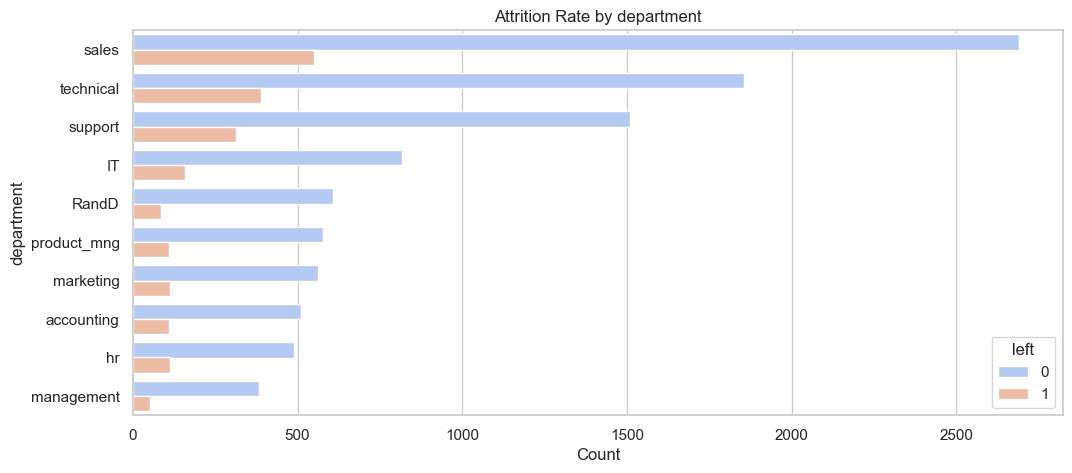

In [137]:
# Rename the column to remove the extra space
df.rename(columns={"departments ": "departments"}, inplace=True)

# Re-run the department-wise attrition visualization
plt.figure(figsize=(12, 5))
sns.countplot(y="departments", hue="left", data=df, palette="coolwarm", order=df["departments"].value_counts().index)
plt.title("Attrition Rate by department")
plt.xlabel("Count")
plt.ylabel("department")
plt.show()
